In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from zlib import crc32
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
def SplitTrainTestSet(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#해시값을 계산하여 해시의 마지막 바이트의 값이 51(256의 20%)보다 작거나 같은 샘플만 테스트 셋으로 선정
#여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 셋이 동일하게 유지됨
#새로운 테스트 셋은 새 샘플의 20%를 갖게 되지만 이전 훈련 셋에 있던 샘플은 포함시키지 않음
def CheckTestSet(idntifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xFFFFFFFF < test_ratio * 2**32

def SplitTrainTestSetByID(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:CheckTestSet(id_, test_ratio))
    return ata.loc[~in_test_set], data.loc[in_test_set]

def DisplayScores(scores) :
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("STD : ", scores.std())
    

In [3]:
CSV_PATH = "data"

In [4]:
def load_csv(path=CSV_PATH):
    csv_path = os.path.join(path, "data.csv")
    return pd.read_csv(csv_path)

In [5]:
edge_pair = load_csv()
edge_pair.head()

,u,v
0,856,836
1,858,834
2,861,832
3,864,830
4,867,828


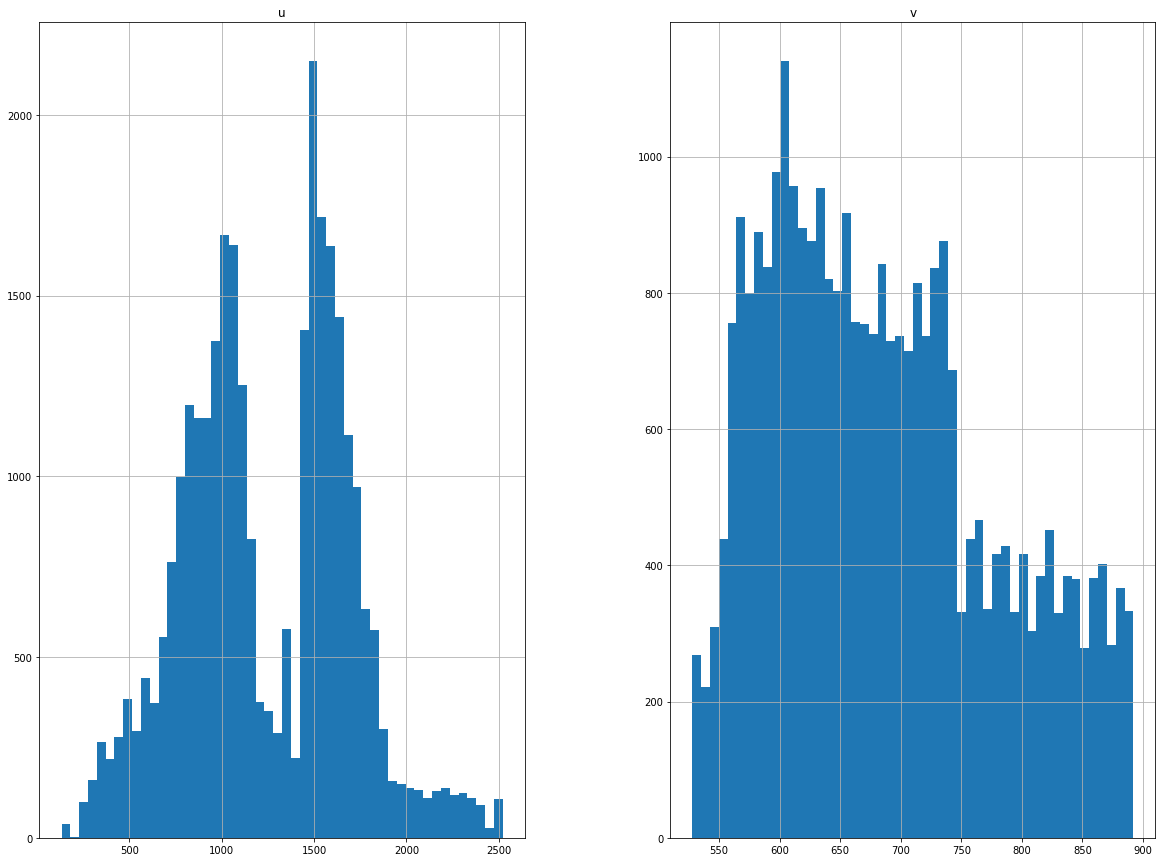

In [6]:
edge_pair.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C88DEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CBBE470>]], dtype=object)

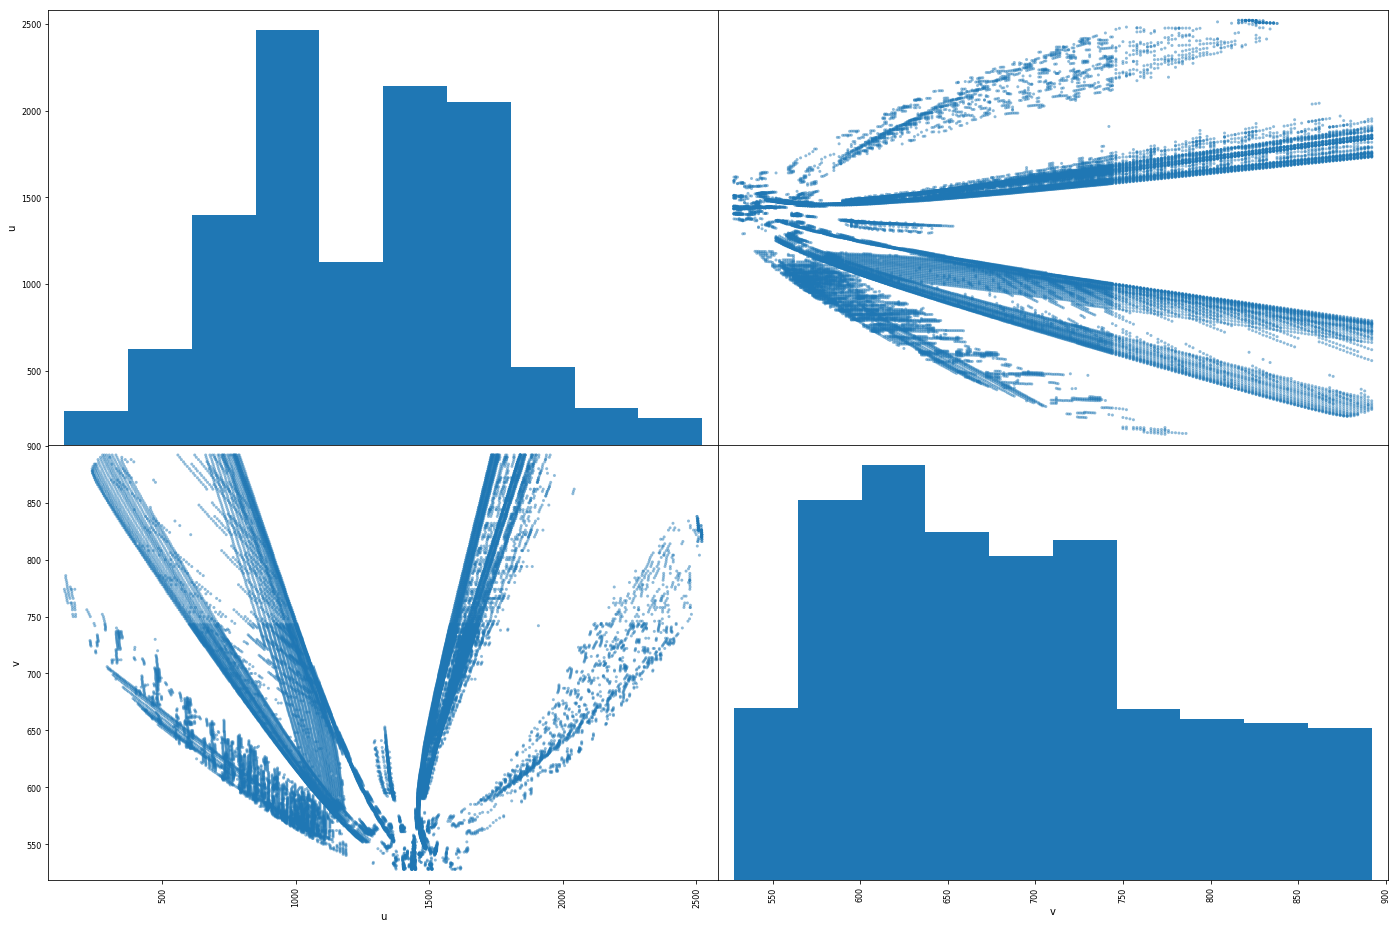

In [14]:
attr = ["u", "v"]
scatter_matrix(edge_pair[attr], figsize=(24,16))

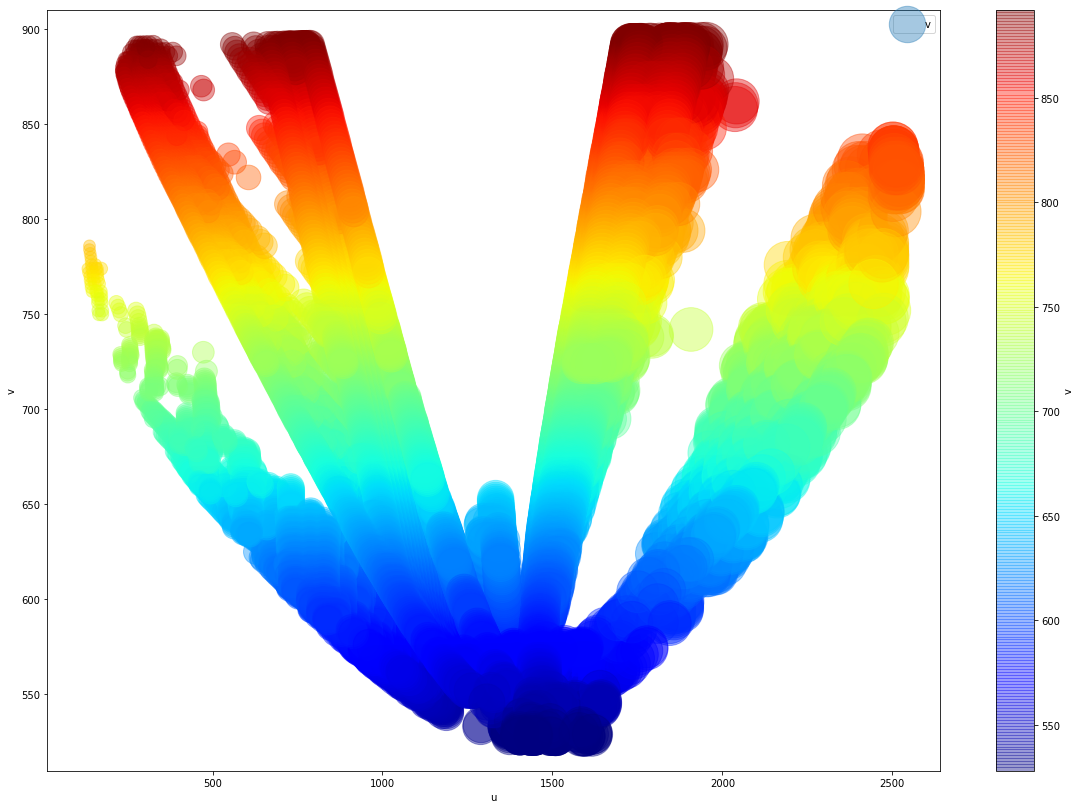

In [17]:
edge_pair.plot(kind="scatter", x="u", y="v", alpha=0.4, figsize=(20,14),
               s=edge_pair["u"], label="v",
               cmap=plt.get_cmap("jet"),
               c="v",
               colorbar=True, sharex=False)



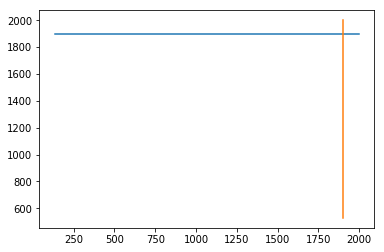

In [18]:
plt.legend()
x = np.linspace(min(edge_pair["u"]), 2000, 100)
y = np.linspace(min(edge_pair["v"]), 2000, 100)
x1 = np.full(len(x), 1900)
y1 = np.full(len(y), 1900)
plt.plot(x, x1)
plt.plot(y1, y)